https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
#data is a csv file w one column denoting names and another denoting the corresponding Jpeg

#Vit (Adam)

#tutorial to use: https://theaisummer.com/hugging-face-vit/
#uses CIFAR10 

#Resnet 50 (David)

#Cvt (Vivian)

Load Dataset :(

Part I. ViT (Adam)

In [ ]:
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/566_Final_Project/Resnet')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install datasets

from datasets import load_dataset
dataset = load_dataset("/content/drive/MyDrive/566_Final_Project/WonderData/Wonders of World/Wonders of World")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 28.6 MB/s 
     |████████████████████████████████| 7.6 MB 60.3 MB/s 
     |████████████████████████████████| 182 kB 74.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 26.7 MB/s 
     |████████████████████████████████| 115 kB 60.5 MB/s 
     |████████████████████████████████| 212 kB 73.9 MB/s 
     |████████████████████████████████| 127 kB 74.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Resolving data files:   0%|          | 0/3846 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/Wonders of World-4b9e41599998ffd5/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd

import shutil

import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader
from torch.nn.modules import Module
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Resize
import torchvision.transforms as transforms
import torchvision.models as models

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tqdm.notebook as t

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
main_path = '/content/drive/MyDrive/566_Final_Project/WonderData/Wonders of World/Wonders of World'
dir_list = os.listdir(main_path)

for num, path in enumerate(dir_list):
    print(f'{path} : {len(os.listdir(os.path.join(main_path, path)))}')

burj_khalifa : 390
chichen_itza : 340
christ_the_reedemer : 323
eiffel_tower : 391
great_wall_of_china : 392
machu_pichu : 393
pyramids_of_giza : 372
roman_colosseum : 394
statue_of_liberty : 238
stonehenge : 204
taj_mahal : 158
venezuela_angel_falls : 251


In [ ]:
BATCH_SIZE = 8
EPOCHS = 10
DEVICE = 'cuda'

In [ ]:
def get_train_val_image_list(main_path, train_size, val_size):
    train_set = dict()
    val_set = dict()
    
    dir_list = os.listdir(main_path)
    
    for path in t.tqdm_notebook(dir_list):
        file_list = os.listdir(os.path.join(main_path, path))

        total_files = len(file_list)
        train_list = file_list[:train_size]
        val_list = file_list[train_size:train_size+val_size]
        
        train_set[path] = [os.path.join(main_path, path,n) for n in t.tqdm_notebook(train_list)]
        val_set[path] = [os.path.join(main_path, path,n) for n in t.tqdm_notebook(val_list)]
        
        
    return train_set, val_set
    
def get_class_list(train_set):
    idx_to_classes = dict()
    classes_to_idx = dict()
    
    for count, key in enumerate(train_set.keys()):
        idx_to_classes[count] = key
        classes_to_idx[key] = count
        
    return idx_to_classes, classes_to_idx
def get_average_height_width(train_set):
    total_files = 0
    total_height = 0
    total_width = 0
    
    for key, img_list in t.tqdm_notebook(train_set.items()):
        for img in img_list:
            total_width += img.shape[0]
            total_height += img.shape[1]
            total_files += 1
            
    return int(total_width / total_files), int(total_height / total_files)

In [ ]:
train_list, val_list = get_train_val_image_list(main_path, train_size=150, val_size=8)
idx_to_classes, classes_to_idx = get_class_list(train_list)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
def copy_files(dirname, dest, img_list):
    if os.path.isdir(os.path.join(dest, dirname)) == False:
        os.mkdir(os.path.join(dest, dirname))
    
    for key, img_path_list in img_list.items():
        if os.path.isdir(os.path.join(dest,dirname, key)) == False:
            os.mkdir(os.path.join(dest,dirname, key))
        for path in img_path_list:
            shutil.copy(path,os.path.join(dest,dirname, key))

In [ ]:
#you dont have to keep rerunning this
#copy_files('Train', './', train_list)
#copy_files('Valid', './', val_list)

In [ ]:
class WoWDataset(Dataset):
    def __init__(self, data, num_classes ):
        self.data = data
        self.num_classes = num_classes
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        
        img = self.data[idx][0]
        label = self.data[idx][1]
        
        o_label = [0] * self.num_classes
        o_label[label] = 1

        #for regular images, only transformation is resizing them
        #r = transforms.Resize(size=(4,4))
        
        #for augmented images, adding a gaussian blur, a random horizontal flip,
        # and random rotation to see if this helps with the overfitting issue.
        r = transforms.Compose([
                      transforms.Resize([16, 16]),
                      transforms.RandomRotation(180),
                      transforms.GaussianBlur(kernel_size=(5), sigma=(0.1, 5))
                  ])
        o_label = torch.tensor(o_label, dtype=torch.float)
        return r(img), o_label
    #transform=transforms.Compose([
                      #transforms.RandomHorizontalFlip(),
                      #transforms.RandomVerticalFlip(),
     #                 transforms.RandomRotation(180),
     #                 transforms.GaussianBlur(kernel_size=(5), sigma=(0.1, 5))
                      #transforms.Resize([32, 32]),
                      #transforms.RandomCrop([28, 28]),
                      #transforms.ToTensor()
     #             ])

In [ ]:
train_data = ImageFolder('./Train', transform = ToTensor())
val_data = ImageFolder('./Valid', transform = ToTensor())

In [ ]:
train_dataset = WoWDataset(train_data, len(list(idx_to_classes.keys())))
val_dataset = WoWDataset(val_data, len(list(idx_to_classes.keys())))

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = 8, pin_memory=True, shuffle=True)
val_dataloader =DataLoader(val_dataset, batch_size = 8, pin_memory=True)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
print(torch.cuda.device_count())

1


Create Model/Import Model

In [ ]:
#Model Training

from torch.optim import AdamW
from transformers import AutoFeatureExtractor, ResNetForImageClassification
from torch.nn import functional as F

model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")
cvt_loss = torch.nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=0.0001, weight_decay = 0.0001)
num_epochs = 20
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

conv_loss_set_relu = []
acc_set_conv = []
train_loss_set = []
val_acc_set = []
train_acc_set = []
val_loss_set = []

for epoch in range(0, num_epochs):
  
    cvt_loss = 0.0
    cvt_cl = 0
    conv_avg_relu_loss = 0
    conv_total = 0
    conv_correct = 0
    train_total = 0
    train_correct = 0
    val_loss_count = 0
    val_cl = 0
    
    for i, (images, labels) in enumerate(train_dataloader):
      images = images
      new_labels = torch.argmax(labels,axis = 1)
      new_labels = new_labels.long()

      images, new_labels = images.to(device), new_labels.to(device)

      outputs = model(images)
      new_logits = outputs.logits.float()
    
      loss = nn.CrossEntropyLoss()
      new_loss = loss(new_logits, new_labels)

      optimizer.zero_grad()
      new_loss.backward()
      optimizer.step()
      
      cvt_loss += new_loss.item()
      cvt_cl += 1

      acc_output = torch.argmax(new_logits, axis = 1)
      train_total += new_labels.size(0)
      train_correct += acc_output.eq(new_labels).sum().item()

    conv_avg_relu_loss = cvt_loss/len(train_dataloader)
    train_acc = train_correct/train_total
    print(train_acc)
    print(conv_avg_relu_loss)
    train_loss_set.append(conv_avg_relu_loss)
    train_acc_set.append(train_acc)

    for i, (images, labels) in enumerate(val_dataloader):
      labels = torch.argmax(labels, axis = 1)
      labels = labels.long()

      images, new_labels = images.to(device), labels.to(device)

      outputs = model(images)

      new_outputs = outputs.logits.float()
      val_loss = loss(new_outputs, new_labels)

      val_loss.backward()

      val_loss_count += val_loss.item()
      val_cl += 1

      new_outputs = torch.argmax(new_outputs, axis = 1)

      conv_total += labels.size(0)
      conv_correct += new_outputs.eq(new_labels).sum().item()

    conv_acc = conv_correct/conv_total
    print(conv_acc)
    val_acc_set.append(conv_acc)

    val_epoch_loss = val_loss_count/len(val_dataloader)
    print(val_epoch_loss)
    val_loss_set.append(val_epoch_loss)

0.04888888888888889
5.849566918479072
0.09278350515463918
3.665552909557636
0.14333333333333334
2.5568857786390518
0.20618556701030927
2.2786817458959727
0.21777777777777776
2.292906519042121
0.24742268041237114
2.267186531653771
0.2627777777777778
2.178908856179979
0.30927835051546393
2.0089770005299497
0.2961111111111111
2.063128769662645
0.2268041237113402
2.0413636519358707
0.30944444444444447
2.0173250622219507
0.32989690721649484
1.989194787465609
0.3338888888888889
1.915739582379659
0.30927835051546393
2.0744948983192444
0.3488888888888889
1.8952674939897325
0.3917525773195876
1.817212136892172
0.3688888888888889
1.8416370627615186
0.38144329896907214
1.8300354389043956
0.39611111111111114
1.8142277230156794
0.4020618556701031
1.8671078773645253
0.3883333333333333
1.80833346552319
0.38144329896907214
1.8655034303665161
0.4022222222222222
1.7519877444373237
0.32989690721649484
1.9041598530916066
0.4027777777777778
1.7414785358640883
0.35051546391752575
1.8491747012505164
0.421666

In [ ]:
print(train_loss_set, val_loss_set, train_acc_set, val_acc_set)

[5.849566918479072, 2.5568857786390518, 2.292906519042121, 2.178908856179979, 2.063128769662645, 2.0173250622219507, 1.915739582379659, 1.8952674939897325, 1.8416370627615186, 1.8142277230156794, 1.80833346552319, 1.7519877444373237, 1.7414785358640883, 1.6881027502483792, 1.68978237496482, 1.6525784564018249, 1.6649121316274007, 1.5800981309678819, 1.641972721947564, 1.5851499777370028] [3.665552909557636, 2.2786817458959727, 2.267186531653771, 2.0089770005299497, 2.0413636519358707, 1.989194787465609, 2.0744948983192444, 1.817212136892172, 1.8300354389043956, 1.8671078773645253, 1.8655034303665161, 1.9041598530916066, 1.8491747012505164, 1.9577412788684552, 1.7472029740993793, 1.7606504009320185, 1.848267756975614, 1.862972589639517, 1.7452903940127447, 1.769529328896449] [0.04888888888888889, 0.14333333333333334, 0.21777777777777776, 0.2627777777777778, 0.2961111111111111, 0.30944444444444447, 0.3338888888888889, 0.3488888888888889, 0.3688888888888889, 0.39611111111111114, 0.3883333

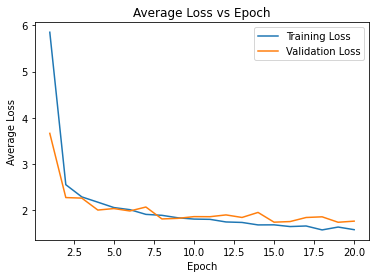

In [ ]:
x = np.asarray(list(range(1,21)))
plt.plot(x, train_loss_set, label = "Training Loss")
plt.plot(x, val_loss_set, label = "Validation Loss")
plt.legend()
plt.xlabel('Epoch') 
plt.ylabel('Average Loss')  
plt.title('Average Loss vs Epoch') 
plt.show()

In [ ]:
print('asdf')

asdf


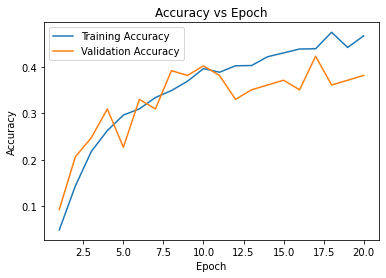

In [ ]:
x = np.asarray(list(range(1,21)))
plt.plot(x, train_acc_set, label = "Training Accuracy")
plt.plot(x, val_acc_set, label = "Validation Accuracy")
plt.legend()
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Epoch') 
plt.show()

In [ ]:
max(val_acc_set)

0.422680412371134